## Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as XGBRegressor
from sklearn.model_selection import GridSearchCV
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import pickle
import category_encoders as ce
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Business Understanding 

### How much should a used motorcycle cost? 

### Data Scraping/ Mining

I obtained my data set from Craigslist by scraping thousands of indivdual listings from major cities (New York ,Los Angeles, Miami, Austin etc..) across the United States. With each individual listing I was able to obtain the year the motorcycle was made and the company that produced the motorcycle. This dataset that the model was trained on was over 20,000 rows of datapoints. For many of the listings I was able to obtain features that will help with price prediction (odometer reading, condition, fuel type, etc..)

### Business Problem


The secondary market (Craigslist, Facebook Marketplace, Ebay, etc.. ) is completely unregulated and sometimes you want to know if you are overpaying for a product or getting a good deal.

The item that we are using is motorcycles and to predict how much a used motorcycle should cost we will use many of their features (make, model, odometer, condition, year, etc.. )

### Import the pickled DataFrames

In [2]:
cd scraped_cities_df/

/Users/avijames/Dropbox/Mac (2)/Documents/Course/capstone/motorcycle_price_prediction/scraped_cities_df


In [3]:
df_orange=pd.read_pickle('orangeCounty_motorcycle')
df_chicago=pd.read_pickle('chicago_motorcycle')
df_losangeles=pd.read_pickle('losangeles_motorcycle')
df_miami=pd.read_pickle('miami_motorcycle')
df_sandiego=pd.read_pickle('sandiego_motorcycle')
df_seattle=pd.read_pickle('seattle_motorcycle')
df_newyork=pd.read_pickle('newyork_motorcycle')
df_phoenix=pd.read_pickle('phoenix_motorcycle')
df_atlanta = pd.read_pickle('atlanta_motorcycle')
df_minneapolis =pd.read_pickle('minneapolis_motorcycle')
df_boston =pd.read_pickle('boston_motorcycle')
df_portland =pd.read_pickle('portland_motorcycle')
df_lasvegas = pd.read_pickle('lasvegas_motorcycle')
df_tampa =pd.read_pickle('tampa_motorcycle')
df_dallas =pd.read_pickle('dallas_motorcycle')
df_washington =pd.read_pickle('washingtonDC_motorcycle')
df_austin =pd.read_pickle('austin_motorcycle')
df_houston =pd.read_pickle('houston_motorcycle')
df_orlando =pd.read_pickle('orlando_motorcycle')
df_philadelphia =pd.read_pickle('philadelphia_motorcycle')
df_kansascity =pd.read_pickle('kansascity_motorcycle')
df_detroit =pd.read_pickle('detroit_motorcycle')
df_charlotte =pd.read_pickle('charlotte_motorcycle')
df_stlouis =pd.read_pickle('stlouis_motorcycle')
df_northjersey =pd.read_pickle('northjersey_motorcycle')
df_pittsburgh =pd.read_pickle('pittsburgh_motorcycle')
df_southjersey =pd.read_pickle('southjersey_motorcycle')
df_columbus =pd.read_pickle('columbus_motorcycle')
df_nashville =pd.read_pickle('nashville_motorcycle')
df_baltimore =pd.read_pickle('baltimore_motorcycle')
df_boise =pd.read_pickle('boise_motorcycle')
df_spokane =pd.read_pickle('spokane_motorcycle')
df_sanantonio =pd.read_pickle('sanantonio_motorcycle')
df_sarasota =pd.read_pickle('sarasota_motorcycle')
df_milwaukee =pd.read_pickle('milwaukee_motorcycle')
df_norfolk =pd.read_pickle('norfolk_motorcycle')
df_fortmeyers =pd.read_pickle('fortmyers_motorcycle')
df_providence =pd.read_pickle('providence_motorcycle')
df_indianapolis =pd.read_pickle('indianapolis_motorcycle')
df_jacksonville =pd.read_pickle('jacksonville_motorcycle')
df_cincinnati =pd.read_pickle('cincinnati_motorcycle')



Concatane them into one dataframe and reset the index

In [4]:
df =pd.concat([df_orange, df_chicago, df_losangeles, df_miami, df_sandiego, df_seattle, df_newyork, 
               df_phoenix, df_atlanta, df_minneapolis, df_boston, df_portland, df_lasvegas, df_tampa, df_dallas,
               df_washington, df_austin, df_houston, df_orlando, df_philadelphia, df_kansascity, df_detroit, 
               df_charlotte, df_stlouis, df_northjersey, df_pittsburgh, df_southjersey, df_columbus, df_nashville,
               df_baltimore, df_boise, df_spokane, df_sanantonio, df_sarasota, df_milwaukee, df_norfolk, df_fortmeyers,
               df_providence, df_indianapolis, df_jacksonville, df_cincinnati
              ])
df =df.reset_index(drop=True)
df

,Price,URL,title,bikeTitle,attributes,VIN,fuel,odometer,paint color,title status,transmission,condition,engine displacement (CC),type,year,years
0,"$13,995",https://orangecounty.craigslist.org/mcd/d/oran...,2002 Harley-Davidson FLSTSI SKU:12858,2002 Harley-Davidson FLSTSI,", VIN: 1HD1BYB192Y026148, fuel: , odometer: 12...",1HD1BYB192Y026148,,12382,black,clean,manual,NaN,NaN,NaN,2002,2002
1,"$9,995",https://orangecounty.craigslist.org/mcd/d/oran...,2003 Harley-Davidson FLHTCUI (ANNIVERSARY) SKU...,2003 Harley-Davidson FLHTCUI (ANNIVER,", VIN: 1HD1FCW1X3Y604180, fuel: , odometer: 36...",1HD1FCW1X3Y604180,,36852,blue,clean,manual,NaN,NaN,NaN,2003,2003
2,"$22,995",https://orangecounty.craigslist.org/mcd/d/oran...,2019 Harley-Davidson FLHX - Street Glide SKU:1...,2019 Harley-Davidson FLHX - Street Gl,", VIN: 1HD1KBC3XKB603737, fuel: , odometer: 11...",1HD1KBC3XKB603737,,11704,custom,clean,manual,NaN,NaN,NaN,2019,2019
3,"$3,000",https://orangecounty.craigslist.org/mcy/d/oran...,2002 Honda VTX 1800 C Custom,2002 Honda VTX,", condition: excellent, engine displacement (C...",NaN,gas,69000,black,clean,manual,excellent,1800,cafe racer,2002,2002
4,"$19,995",https://orangecounty.craigslist.org/mcd/d/oran...,2016 Harley-Davidson FLHX - Street Glide SKU:1...,2016 Harley-Davidson FLHX - Street Gl,", VIN: 1HD1KBM30GB657117, fuel: , odometer: 92...",1HD1KBM30GB657117,,9284,black,clean,manual,NaN,NaN,NaN,2016,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23039,"$15,000",https://cincinnati.craigslist.org/mcy/d/cincin...,Harley Panhead- trade,Harley Davidson Panhead,", fuel: gas, odometer: 1000, transmission: manual",NaN,gas,1000,NaN,NaN,manual,NaN,NaN,NaN,None,Harl
23040,"$7,000",https://cincinnati.craigslist.org/mcy/d/cincin...,2012 Kawasaki Vulcan 900 Classic,2012 kawasaki vulcan 900 classic,", condition: excellent, engine displacement (C...",NaN,gas,17543,blackstreet legal,clean,manual,excellent,900,cruiser,2012,2012
23041,"$8,000",https://cincinnati.craigslist.org/mcy/d/hamilt...,2013 Triumph Tiger Explorer 1200 ABS,triumph tiger explorer abs,", condition: excellent, engine displacement (C...",NaN,gas,12200street legal,NaN,NaN,manual,excellent,1200,NaN,2013,triu
23042,"$1,500",https://cincinnati.craigslist.org/mcy/d/floren...,2006 Genuine Black Cat 🐈‍⬛ 50cc 2 stroke motor...,2006 Genuine Black Cat 50,", condition: like new, engine displacement (CC...",NaN,gas,60street legal,NaN,clean,automatic,like new,50,scooter,2006,2006


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23044 entries, 0 to 23043
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Price                     23044 non-null  object
 1   URL                       23044 non-null  object
 2   title                     23044 non-null  object
 3   bikeTitle                 23044 non-null  object
 4   attributes                23044 non-null  object
 5   VIN                       7695 non-null   object
 6   fuel                      21332 non-null  object
 7   odometer                  20995 non-null  object
 8   paint color               14857 non-null  object
 9   title status              18122 non-null  object
 10  transmission              21374 non-null  object
 11  condition                 12106 non-null  object
 12  engine displacement (CC)  8369 non-null   object
 13  type                      9423 non-null   object
 14  year                  

In [6]:
df.describe()

,Price,URL,title,bikeTitle,attributes,VIN,fuel,odometer,paint color,title status,transmission,condition,engine displacement (CC),type,year,years
count,23044,23044,23044,23044,23044,7695,21332,20995,14857,18122,21374,12106,8369,9423,16766,20156
unique,2000,22651,17407,13444,17507,5456,6,7758,25,7,3,12,472,15,194,439
top,$0,https://seattle.craigslist.org/oly/mcd/d/olymp...,Harley Davidson,harley davidson,", fuel: gas, odometer: 1, transmission: manual",NA,gas,1,black,clean,manual,excellent,1200,cruiser,2021,2021
freq,644,12,56,121,163,36,17999,1279,3316,17658,15258,5566,630,2124,1365,1684


In [7]:
#Make the title column lowercase before we get each company
df['title_lower'] = df['title'].str.lower()

### Get the company for each motorcycle listing

Made a list of the top company motorcycles, and then if the company matches with some string in the title it will be extracted

In [8]:
makes =['harley-davidson', 'honda', 'yamaha', 'ducati', 'suzuki','ktm', 'bmw', 'triumph', 'kawasaki', 'vespa', 'victory', 'aprilia', 'norton', 'indian','bajaj']

def matcher(x):
    for i in makes:
        if i.lower() in x.lower():
            return i
    else:
        return np.nan



In [9]:
#applying the function and creating a new column
df['make'] = df['title'].apply(matcher)

In [10]:
#checking if we get something different or additional information that wasn't availble from the title column
df['make_title'] = df['bikeTitle'].apply(matcher)

In [11]:
df['make'].value_counts().sum()

15590

In [12]:
df['make_title'].value_counts().sum()

16150

As you can see we have different amounts.

We will then fill in all the missing values in make and make_title with the other one and create a new column

In [13]:
df['final_make'] = df["make"].fillna(df["make_title"])

In [14]:
df['final_make'] = df["make_title"].fillna(df["make"])

In [15]:
#it worked
df['final_make'].value_counts()

harley-davidson    3507
honda              3322
yamaha             2338
kawasaki           2205
suzuki             1390
bmw                1029
ducati              785
ktm                 764
triumph             681
indian              425
victory             194
aprilia             138
vespa               125
norton                5
bajaj                 1
Name: final_make, dtype: int64

Doing the same thing for year and years and making a new column

In [16]:
df['year'].value_counts().sum()

16766

In [17]:
df['years'].value_counts().sum()

20156

In [18]:
df['final_years'] = df["year"].fillna(df["years"])

In [19]:
df['final_years'] = df["years"].fillna(df["year"])

In [20]:
df['final_years'].value_counts().sum()

21995

In [21]:
df['paint color'].value_counts()

black                 3316
red                   1756
blackstreet legal     1300
custom                1206
blue                  1191
white                  825
redstreet legal        772
bluestreet legal       558
silver                 515
grey                   477
orange                 459
green                  385
whitestreet legal      314
                       268
customstreet legal     236
silverstreet legal     212
orangestreet legal     203
greystreet legal       196
yellow                 181
greenstreet legal      155
yellowstreet legal      96
brown                   93
purple                  52
purplestreet legal      51
brownstreet legal       40
Name: paint color, dtype: int64

Cleaning up the paint color column to have a uniform color

In [22]:
df['paint color'] = df['paint color'].str.replace('blackstreet legal', 'black')
df['paint color'] = df['paint color'].str.replace('redstreet legal', 'red')
df['paint color'] = df['paint color'].str.replace('bluestreet legal', 'blue')
df['paint color'] = df['paint color'].str.replace('whitestreet legal', 'white')
df['paint color'] = df['paint color'].str.replace('customstreet legal', 'custom')
df['paint color'] = df['paint color'].str.replace('orangestreet legal', 'orange')
df['paint color'] = df['paint color'].str.replace('greenstreet legal', 'green')
df['paint color'] = df['paint color'].str.replace('greystreet legal', 'grey')
df['paint color'] = df['paint color'].str.replace('yellowstreet legal', 'yellow')
df['paint color'] = df['paint color'].str.replace('purplestreet legal', 'purple')
df['paint color'] = df['paint color'].str.replace('brownstreet legal', 'brown')
df['paint color'] = df['paint color'].str.replace('silverstreet legal', 'silver')

In [23]:
df

,Price,URL,title,bikeTitle,attributes,VIN,fuel,odometer,paint color,title status,...,condition,engine displacement (CC),type,year,years,title_lower,make,make_title,final_make,final_years
0,"$13,995",https://orangecounty.craigslist.org/mcd/d/oran...,2002 Harley-Davidson FLSTSI SKU:12858,2002 Harley-Davidson FLSTSI,", VIN: 1HD1BYB192Y026148, fuel: , odometer: 12...",1HD1BYB192Y026148,,12382,black,clean,...,NaN,NaN,NaN,2002,2002,2002 harley-davidson flstsi sku:12858,harley-davidson,harley-davidson,harley-davidson,2002
1,"$9,995",https://orangecounty.craigslist.org/mcd/d/oran...,2003 Harley-Davidson FLHTCUI (ANNIVERSARY) SKU...,2003 Harley-Davidson FLHTCUI (ANNIVER,", VIN: 1HD1FCW1X3Y604180, fuel: , odometer: 36...",1HD1FCW1X3Y604180,,36852,blue,clean,...,NaN,NaN,NaN,2003,2003,2003 harley-davidson flhtcui (anniversary) sku...,harley-davidson,harley-davidson,harley-davidson,2003
2,"$22,995",https://orangecounty.craigslist.org/mcd/d/oran...,2019 Harley-Davidson FLHX - Street Glide SKU:1...,2019 Harley-Davidson FLHX - Street Gl,", VIN: 1HD1KBC3XKB603737, fuel: , odometer: 11...",1HD1KBC3XKB603737,,11704,custom,clean,...,NaN,NaN,NaN,2019,2019,2019 harley-davidson flhx - street glide sku:1...,harley-davidson,harley-davidson,harley-davidson,2019
3,"$3,000",https://orangecounty.craigslist.org/mcy/d/oran...,2002 Honda VTX 1800 C Custom,2002 Honda VTX,", condition: excellent, engine displacement (C...",NaN,gas,69000,black,clean,...,excellent,1800,cafe racer,2002,2002,2002 honda vtx 1800 c custom,honda,honda,honda,2002
4,"$19,995",https://orangecounty.craigslist.org/mcd/d/oran...,2016 Harley-Davidson FLHX - Street Glide SKU:1...,2016 Harley-Davidson FLHX - Street Gl,", VIN: 1HD1KBM30GB657117, fuel: , odometer: 92...",1HD1KBM30GB657117,,9284,black,clean,...,NaN,NaN,NaN,2016,2016,2016 harley-davidson flhx - street glide sku:1...,harley-davidson,harley-davidson,harley-davidson,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23039,"$15,000",https://cincinnati.craigslist.org/mcy/d/cincin...,Harley Panhead- trade,Harley Davidson Panhead,", fuel: gas, odometer: 1000, transmission: manual",NaN,gas,1000,NaN,NaN,...,NaN,NaN,NaN,None,Harl,harley panhead- trade,NaN,NaN,NaN,Harl
23040,"$7,000",https://cincinnati.craigslist.org/mcy/d/cincin...,2012 Kawasaki Vulcan 900 Classic,2012 kawasaki vulcan 900 classic,", condition: excellent, engine displacement (C...",NaN,gas,17543,black,clean,...,excellent,900,cruiser,2012,2012,2012 kawasaki vulcan 900 classic,kawasaki,kawasaki,kawasaki,2012
23041,"$8,000",https://cincinnati.craigslist.org/mcy/d/hamilt...,2013 Triumph Tiger Explorer 1200 ABS,triumph tiger explorer abs,", condition: excellent, engine displacement (C...",NaN,gas,12200street legal,NaN,NaN,...,excellent,1200,NaN,2013,triu,2013 triumph tiger explorer 1200 abs,triumph,triumph,triumph,triu
23042,"$1,500",https://cincinnati.craigslist.org/mcy/d/floren...,2006 Genuine Black Cat 🐈‍⬛ 50cc 2 stroke motor...,2006 Genuine Black Cat 50,", condition: like new, engine displacement (CC...",NaN,gas,60street legal,NaN,clean,...,like new,50,scooter,2006,2006,2006 genuine black cat 🐈‍⬛ 50cc 2 stroke motor...,NaN,NaN,NaN,2006


### Pickling the dataFrame to be used for the models

In [24]:
# df.to_pickle('df_model')

Last minute cleaning

In [25]:
#dropping null values in necessary columns
df = df.dropna(subset =['final_years', 'final_make'])
#dropping duplicate columns and unnecessary columns
df =df.drop(['make','make_title', 'year', 'years', 'title_lower', 'URL', 'bikeTitle', 'attributes',], axis =1)
#changing the years column to a number value instead of string
df = df[df['final_years'].astype(str).str.isdigit()]
#getting just the numbers out of the odometer column(no commas etc..)
df['odometer'] = df.odometer.str.extract('(^\d*)')
df[["final_years"]] = df[['final_years']].apply(pd.to_numeric)
#cleaning price to make it an integer and making it an integer
df['Price']= df['Price'].apply(lambda x: x.replace('$',''))
df['Price']= df['Price'].apply(lambda x: x.replace(',',''))
df[['Price']] = df[['Price']].apply(pd.to_numeric)
df[['odometer']] = df[['odometer']].apply(pd.to_numeric)
df =df.reset_index(drop=True)


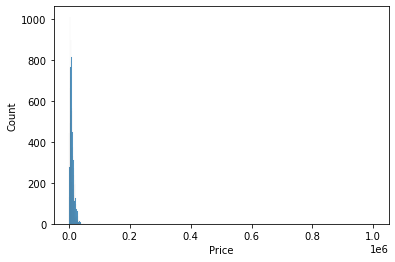

In [26]:
sns.histplot(df['Price'])
plt.ticklabel_format(style='plain', axis='y')

We can see that there are outliers in our price so we need to trim the data. There shouldn't be any motorcycles on craigslist being sold over $50,000

In [27]:
df = df[df['Price']<50000]
df=df[df['Price']>600]

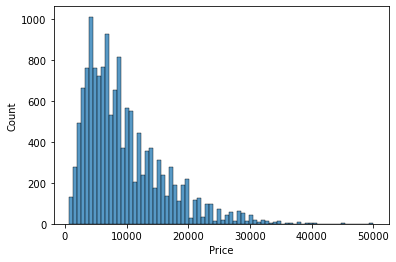

In [28]:
sns.histplot(df['Price'])
plt.ticklabel_format(style='plain', axis='y')

We can see the data is skewed to the right but this looks workable

check Odometer

In [29]:
df['odometer']= df['odometer'].astype(float)

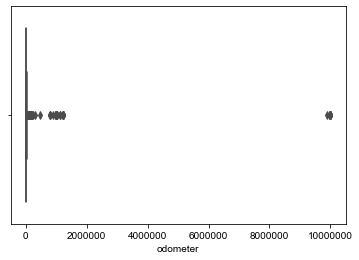

In [30]:
plt.ticklabel_format(style='plain')
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["odometer"])


We can see some outliers for the milieage 

Going to use motorcycles under 100,000 miles

In [31]:
df = df[df['odometer']<100000]

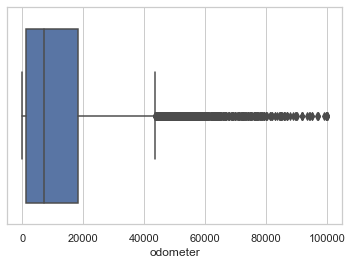

In [32]:
plt.ticklabel_format(style='plain')
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["odometer"])

This looks a lot better

Let's check how the years are

In [33]:
df['final_years'].sort_values()

2953          2
2613          2
714           3
2930          3
1551          3
         ...   
9130       2022
2789       2022
6347       2022
9324       2022
1006    1502021
Name: final_years, Length: 13055, dtype: int64

definitely some outliers

In [34]:
df = df[df['final_years']>1960]
df = df[df['final_years']<2022]

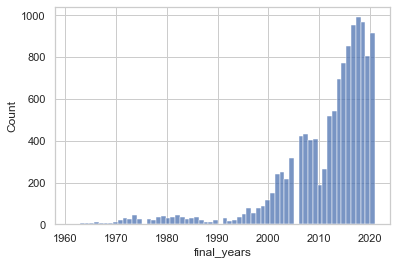

In [35]:
sns.histplot(df['final_years'])
plt.ticklabel_format(style='plain', axis='y')

### Showing the distribution of year of motorcycle tied to the price

/Users/avijames/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


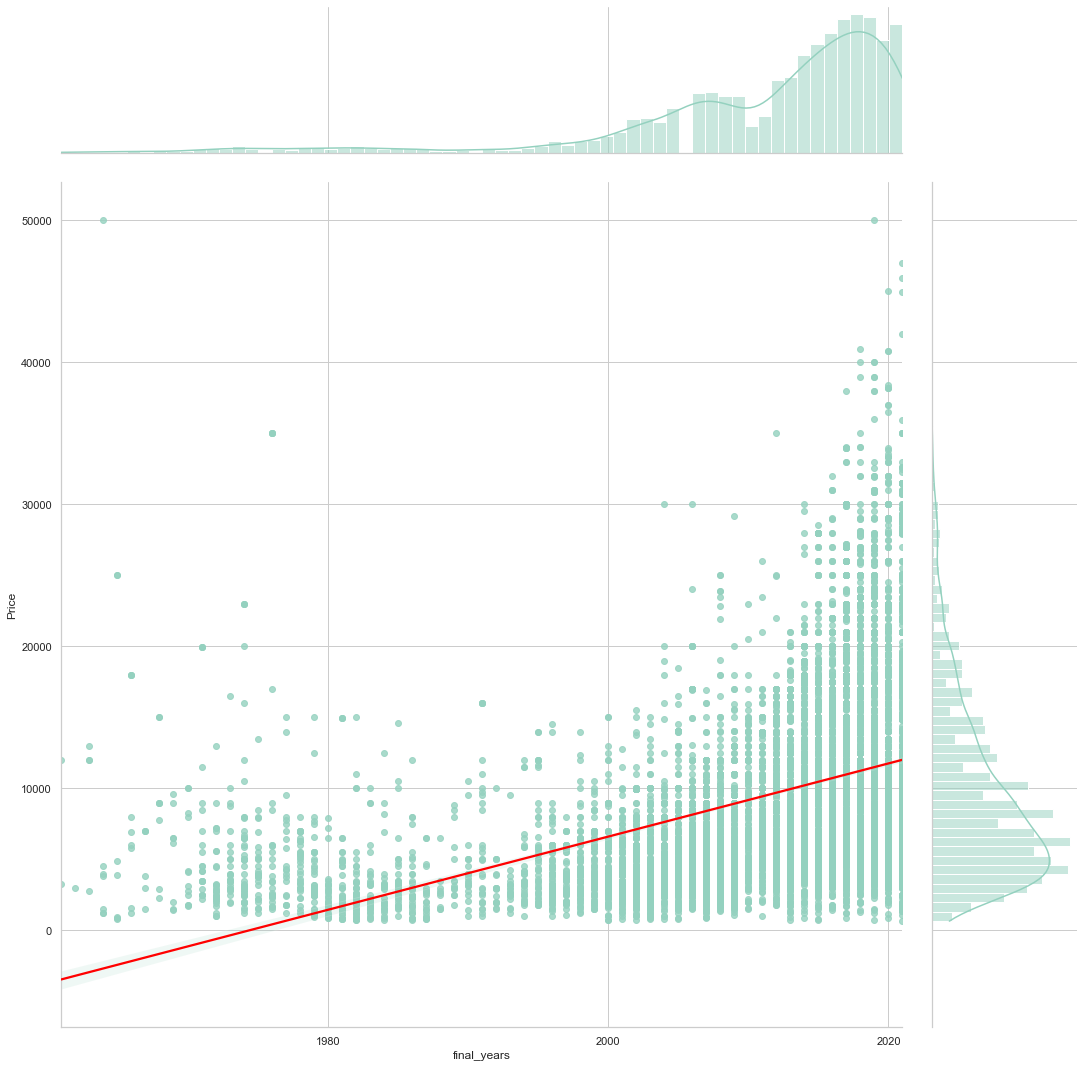

In [36]:

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
g =sns.jointplot(x='final_years',y='Price',data=df,size =15, kind='reg')
sns.set_context("talk", font_scale=3)
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)







The graph shows that higher price is correlated with higher year but just because it is a higher year does not mean it is a higher price

### Distribution of engine displacement

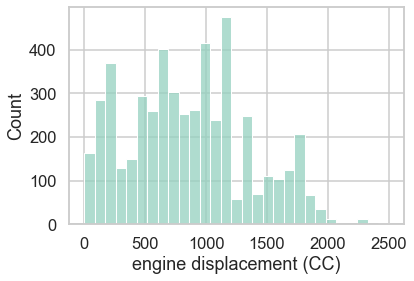

In [37]:
sns.set_context("talk", font_scale=1)
df['engine displacement (CC)']= df['engine displacement (CC)'].astype(float)
sns.histplot(df['engine displacement (CC)'])
plt.ticklabel_format(style='plain', axis='y')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12484 entries, 0 to 14925
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Price                     12484 non-null  int64  
 1   title                     12484 non-null  object 
 2   VIN                       5504 non-null   object 
 3   fuel                      12357 non-null  object 
 4   odometer                  12484 non-null  float64
 5   paint color               9428 non-null   object 
 6   title status              11689 non-null  object 
 7   transmission              12403 non-null  object 
 8   condition                 6932 non-null   object 
 9   engine displacement (CC)  5045 non-null   float64
 10  type                      5508 non-null   object 
 11  final_make                12484 non-null  object 
 12  final_years               12484 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 1.3+ MB


In [39]:
new_df =pd.DataFrame()


In [40]:
new_df['bike_price_median']= df.groupby('final_make')['Price'].median().sort_values(ascending=False).index

In [41]:
df.groupby('final_make')['Price'].median().sort_values(ascending=False)

final_make
indian             16950.0
harley-davidson    13991.0
ducati             11995.0
victory             8999.0
aprilia             8995.0
bmw                 8995.0
norton              8500.0
triumph             8499.5
ktm                 6999.0
suzuki              6000.0
yamaha              5999.0
kawasaki            5799.0
honda               4999.0
vespa               4099.0
bajaj               3000.0
Name: Price, dtype: float64

In [42]:
boxplot_order =new_df['bike_price_median']

Maximum median : Price                       18446.607143
odometer                    23923.482759
engine displacement (CC)     1479.145833
final_years                  2018.126623
dtype: float64
Maximum mean : Price                        8081.087719
odometer                    10519.280000
engine displacement (CC)      825.004228
final_years                  2011.461538
dtype: float64


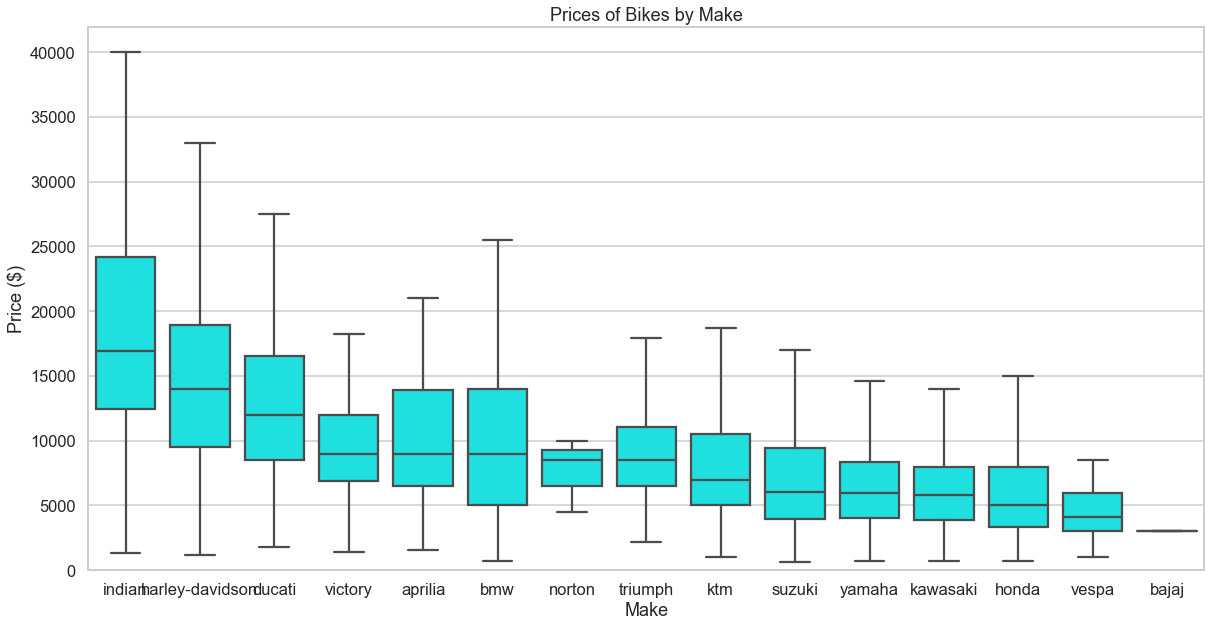

In [43]:
plt.figure(figsize=(20,10))
# Create a boxplot for each state:
sns.boxplot(x='final_make',y='Price',
            data=df,
            showfliers=False,order=boxplot_order, color = 'Aqua')

# Set labels and axis limits:
plt.ylim(0,);
plt.xlabel('Make')
plt.ylabel('Price ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Prices of Bikes by Make');

# Print maximum mean and median value
print('Maximum median',':',df.groupby('final_make').mean().max())
print('Maximum mean',':',df.groupby('final_make').mean().median())

In [44]:
# df.drop("VIN", inplace =True, axis =1)
df =df.reset_index(drop=True)
df['condition'] = df['condition'].str.replace('excellentcryptocurrency ok', 'excellent')
df['condition'] = df['condition'].str.replace('like newcryptocurrency ok', 'like new')
df['condition'] = df['condition'].str.replace('goodcryptocurrency ok', 'good')
df['condition'] = df['condition'].str.replace('faircryptocurrency ok', 'fair')
df['condition'] = df['condition'].str.replace('newcryptocurrency ok', 'new')
df['fuel'] = df['fuel'].fillna(value='other')
df['paint color'] = df['paint color'].fillna(value='other')
df['title status'] = df['title status'].fillna(value='other')
df['transmission'] = df['transmission'].fillna(value='other')
df['condition'] = df['condition'].fillna(value='other')
df['engine displacement (CC)'] = df['engine displacement (CC)'].fillna(value='other')
df['type'] = df['type'].fillna(value='other')
df = df[df['engine displacement (CC)']!='other']

In [45]:
df

,Price,title,VIN,fuel,odometer,paint color,title status,transmission,condition,engine displacement (CC),type,final_make,final_years
3,3000,2002 Honda VTX 1800 C Custom,NaN,gas,69000.0,black,clean,manual,excellent,1800.0,cafe racer,honda,2002
10,5500,1975 Honda CB500T Cafe Racer,NaN,gas,368.0,other,other,manual,excellent,534.0,cafe racer,honda,1975
11,2900,2004 Honda CRF450R,NaN,gas,100.0,other,clean,manual,excellent,450.0,dirtbike,honda,2004
12,5995,2016 Honda NM4,NaN,gas,13000.0,black,clean,automatic,excellent,700.0,cruiser,honda,2016
18,6900,R1200 GS Adventure,WB10397027ZP61214,gas,71900.0,red,clean,automatic,good,1200.0,touring,bmw,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12478,1900,Suzuki GZ250 Marauder,NaN,gas,2793.0,black,clean,manual,excellent,250.0,cruiser,suzuki,2007
12480,19995,'20 BMW R1250GSA,NaN,gas,11715.0,green,clean,manual,excellent,1250.0,other,bmw,2020
12481,3200,2004 V-Strom 1000,NaN,gas,42000.0,blue,clean,manual,fair,1000.0,street,suzuki,2004
12482,7000,2012 Kawasaki Vulcan 900 Classic,NaN,gas,17543.0,black,clean,manual,excellent,900.0,cruiser,kawasaki,2012


### Putting the engine displacements into bins so that we can categorize them better

In [46]:
bins = [0,250,500,750,1000,1250,1500,1750,2000, np.inf]
names =['0-250', '251-500', '501-750', '751-1000', '1001- 1250', '1251-1500', '1501-1750',' 1751-2000', '2001+']

df['engine_displacement'] = pd.cut(df['engine displacement (CC)'], bins, labels=names)

In [47]:
df['engine_displacement'].value_counts().sum()

4999

/Users/avijames/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


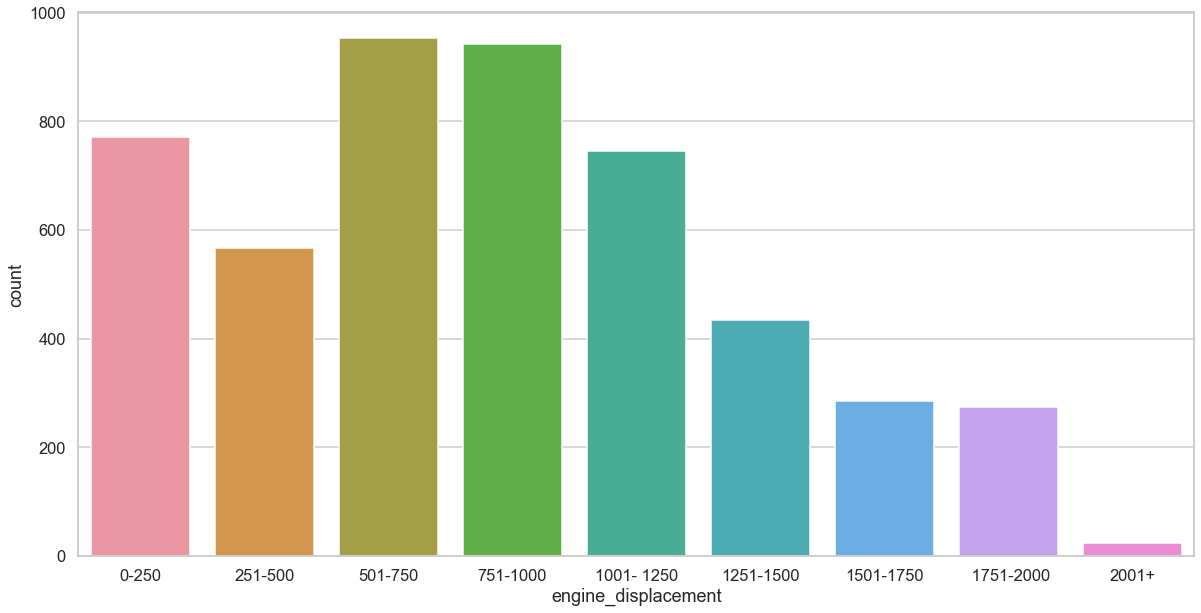

In [48]:
plt.figure(figsize=(20,10))
sns.countplot(df['engine_displacement'])
plt.ticklabel_format(style='plain', axis='y')

## Modeling 

### Functions

In [49]:
# R-squared and RMSE Function
def performance(y_true, y_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then RMSE
    """

    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true, y_predict)

    # Calculate the root mean squared error between 'y_true' and 'y_predict'
    rmse = mean_squared_error(y_true, y_predict, squared=False)

    # Return the score
    return [r2, rmse]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5045 entries, 3 to 12483
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Price                     5045 non-null   int64   
 1   title                     5045 non-null   object  
 2   VIN                       715 non-null    object  
 3   fuel                      5045 non-null   object  
 4   odometer                  5045 non-null   float64 
 5   paint color               5045 non-null   object  
 6   title status              5045 non-null   object  
 7   transmission              5045 non-null   object  
 8   condition                 5045 non-null   object  
 9   engine displacement (CC)  5045 non-null   object  
 10  type                      5045 non-null   object  
 11  final_make                5045 non-null   object  
 12  final_years               5045 non-null   int64   
 13  engine_displacement       4999 non-null   categ

In [51]:
#dropping engine displacement because we have the new columns with the categories
df=df.drop(['engine displacement (CC)','VIN'],axis=1)

## Train Test Split

In [52]:
# Use train_test_split to create training data and testing data
X = df.drop(['Price', 'title'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Baseline Model

#### Using just odometer vs the price


/Users/avijames/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


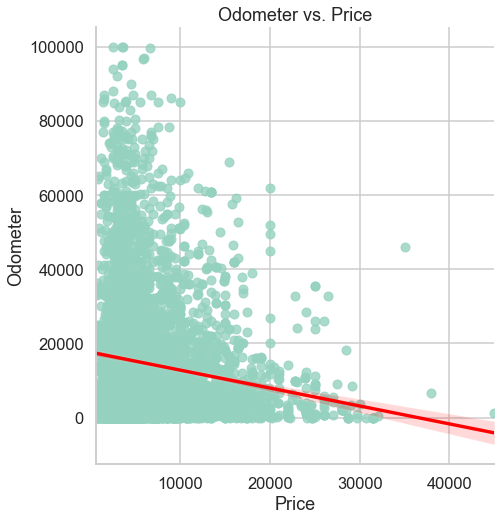

In [53]:
sns.lmplot(data=df, x='Price', y='odometer', size=7,line_kws={'color':'red'})
plt.xlabel('Price')
plt.ylabel('Odometer')
plt.title('Odometer vs. Price');

The graph above shows that there is a negative linear line between price and mileage.

Now we will get the r-squared values for this model

In [54]:
# We are going to perform 3 separate train-test splits within our X_train and y_train, 
# then we will find both the train and the test scores for each
baseline_model = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[['odometer']],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.0189343081282702
Validation score: 0.02125667383241821


Our baseline model showed that our R-Squared is .02

### We can now try adding in dummy classifiers and one hot encoding to make our models better


### Decision Tree Models with Dummies

In [55]:
# Get categoricals
categoricals = ['fuel','paint color','title status', 'transmission', 'condition', 'type', 'final_make', 'engine_displacement']

train_dummies = X_train[categoricals]
test_dummies = X_test[categoricals]

# Create OneHotEncoder object to create dummies
ohe = OneHotEncoder(handle_unknown='ignore')

# Transform the dataset into dummies matrix
enc = ohe.fit(train_dummies)

train_dummies_trans = enc.transform(train_dummies)
test_dummies_trans = enc.transform(test_dummies)

# Dummies values in matrix form
train_data = train_dummies_trans.todense()
test_data = test_dummies_trans.todense()

# New dummy column names
names = ohe.get_feature_names(categoricals)

# Make them into Dataframe
train_dummies_trans_df = pd.DataFrame(train_data, columns=names)
test_dummies_trans_df = pd.DataFrame(test_data, columns=names)

In [56]:
#dropping the other columns
train_dummies_trans_df = train_dummies_trans_df[train_dummies_trans_df.columns.drop(list(train_dummies_trans_df.filter(regex='other')))]
test_dummies_trans_df = test_dummies_trans_df[test_dummies_trans_df.columns.drop(list(test_dummies_trans_df.filter(regex='other')))]

In [57]:
train_dummies_trans_df.reset_index(drop=True, inplace=True)


test_dummies_trans_df.reset_index(drop=True, inplace=True)

X_train =X_train.drop(categoricals, axis=1)
X_test = X_test.drop(categoricals, axis=1)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

X_train_comb = pd.concat([X_train, train_dummies_trans_df], axis=1)
X_test_comb = pd.concat([X_test, test_dummies_trans_df], axis=1)

In [58]:
regressor = DecisionTreeRegressor(random_state=42)  
regressor.fit(X_train_comb, y_train)

DecisionTreeRegressor(random_state=42)

In [59]:
# Make predictions on the test set
y_pred = regressor.predict(X_test_comb) 
score = performance(y_test, y_pred)
score

[0.5629593777534452, 3058.3100249964295]

Showing a .56 for R-Squared and $3,058 for RMSE

Let's try and fine tune our Decision Tree Model

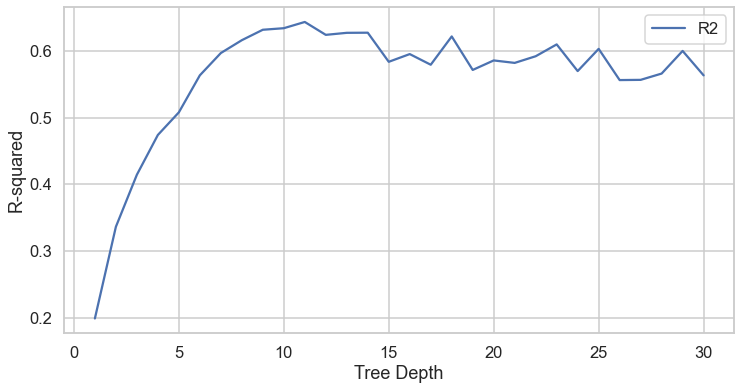

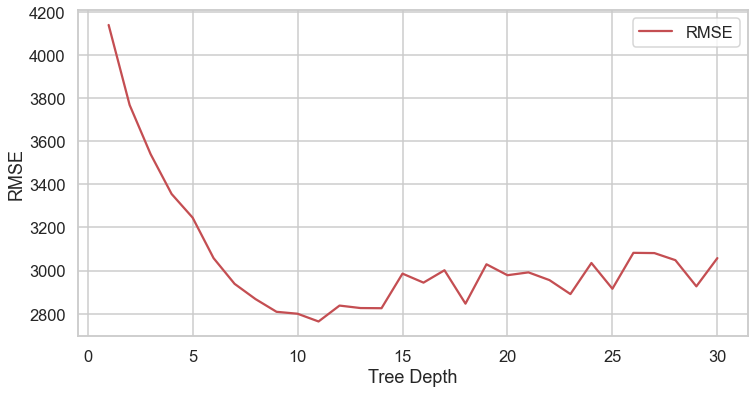

In [60]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 30, 30, endpoint=True)
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=max_depth, 
                                      random_state=42)
    regressor.fit(X_train_comb, y_train)
    y_pred = regressor.predict(X_test_comb)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_depths, mse_results, 'r', label='RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

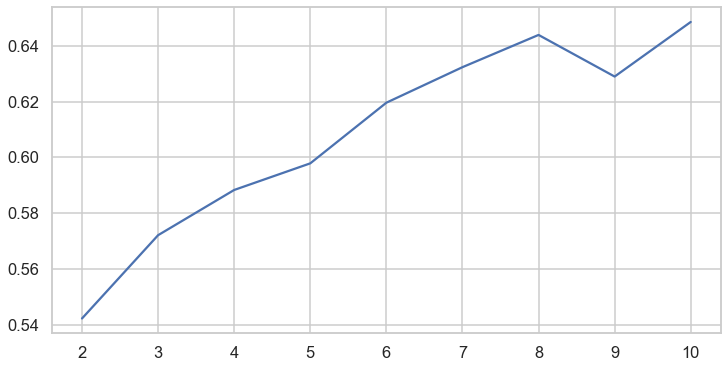

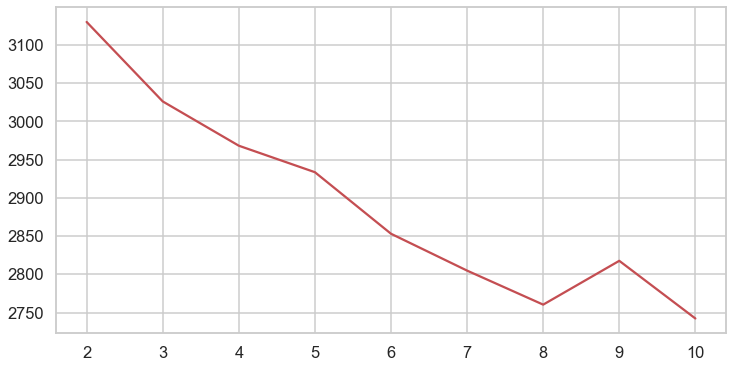

In [61]:
# Identify the optimal minimum split size for given data
min_samples_splits = np.arange(2, 11)
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(min_samples_split=int(min_samples_split),
                                      random_state=45)
    regressor.fit(X_train_comb, y_train)
    y_pred = regressor.predict(X_test_comb)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, mse_results, 'r', label='RMSE')
plt.show()

In [62]:
regressor = DecisionTreeRegressor(min_samples_split=2, max_depth=11, random_state=42)
regressor.fit(X_train_comb, y_train)
y_pred = regressor.predict(X_test_comb)
score = performance(y_test, y_pred)
score[0], score[1], regressor

(0.6432248651271761,
 2763.235469098934,
 DecisionTreeRegressor(max_depth=11, random_state=42))

And we see significant improvement with the optimal parameters

### Maybe a KNN Model can do better?

In [63]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_comb,y_train)
    pred_i = knn.predict(X_test_comb)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

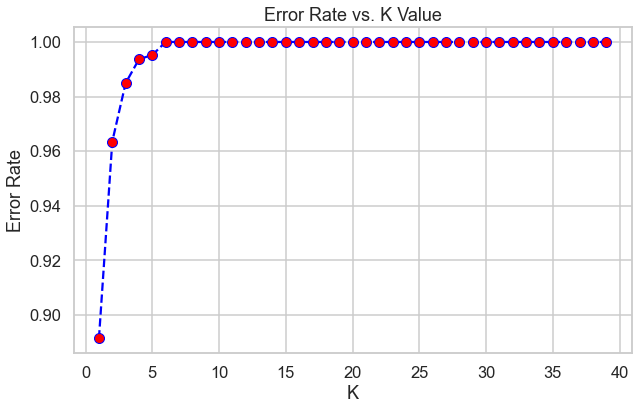

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [65]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_comb,y_train)
y_pred = knn.predict(X_test_comb)
score = performance(y_test, y_pred)
score[0], score[1], knn

(0.05089714443802407, 4506.892979257636, KNeighborsRegressor(n_neighbors=10))

#### That did not do better at all, let's try a random forest pipeline

### Random Forest PipeLine


In [66]:
pipeline1 = make_pipeline(
    ce.TargetEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestRegressor(max_depth=30,
                                      n_estimators=50, n_jobs=-3,
                                        random_state=30)
)
pipeline1.fit(X_train_comb, y_train)

y_pred = pipeline1.predict(X_test_comb)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

MAE: 1485.9391843736646
R^2: 0.7675847500209521
RMSE: 2230.2467537052116


## GridSearch and Cross Validate for our Random Forest PipeLine

In [67]:
param_grid = {
    'randomforestregressor__max_depth': [2,5,6,10,30,50],
    'randomforestregressor__n_jobs': [10,-5,-3,-1, 0,1, 3,5,10],
    'randomforestregressor__n_estimators': [10, 50, 100, 500 ],
}

In [68]:
rfr =RandomForestRegressor()

In [69]:
pipeline2 = make_pipeline(
    ce.TargetEncoder(),
    SimpleImputer(strategy='median'),
    rfr)

In [70]:
grid_rfr = GridSearchCV(pipeline2, param_grid, cv=5, n_jobs=1, return_train_score=True)

In [71]:
results_rfr = grid_rfr.fit(X_train_comb, y_train)

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 966, in __call__
    n_jobs = self._initialize_backend()
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 966, in __call__
    n_jobs = self._initialize_backend()
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 966, in __call__
    n_jobs = self._initialize_backend()
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 966, in __call__
    n_jobs = self._initialize_backend()
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 966, in __call__
    n_jobs = self._initialize_backend()
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 966, in __call__
    n_jobs = self._initialize_backend()
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 966, in __call__
    n_jobs = self._initialize_backend()
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 966, in __call__
    n_jobs = self._initialize_backend()
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 966, in __call__
    n_jobs = self._initialize_backend()
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 966, in __call__
    n_jobs = self._initialize_backend()
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel

/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worke

/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worke

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 966, in __call__
    n_jobs = self._initialize_backend()
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/parallel

/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/avijames/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worke

In [72]:
results_rfr.best_params_

{'randomforestregressor__max_depth': 30,
 'randomforestregressor__n_estimators': 500,
 'randomforestregressor__n_jobs': -3}

## Using the best parameters to make the finished pipeline

In [74]:
pipeline3 = make_pipeline(
    ce.TargetEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestRegressor(max_depth=30,
                                      n_estimators=500, n_jobs=-3,
                                        random_state=30))

In [75]:
pipeline3.fit(X_train_comb, y_train)

y_pred = pipeline3.predict(X_test_comb)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

MAE: 1486.8451687644836
R^2: 0.7690029123256998
RMSE: 2223.4320299235997


### Realy Solid with a 77% R-Squared and RMSE of $2,222

## XGBoost Regression with Pipeline

In [76]:
pipeline4 = make_pipeline(
    ce.TargetEncoder(),
    SimpleImputer(strategy='median'),
    XGBRegressor(learning_rate=0.1,
                max_depth=6,
                min_child_weight=2,
                n_estimators =100,
                subsample=0.9))

pipeline4.fit(X_train_comb, y_train)
y_pred = pipeline4.predict(X_test_comb)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

MAE: 1481.042324253572
R^2: 0.7906198932981898
RMSE: 2116.8413667604714


### Very solid results, let's try with a grid search and cross validation


## Let's try with a Grid Search Cross Validate

In [77]:
param_grid = {
    'xgbregressor__learning_rate': [0.1, 0.5, 1],
    'xgbregressor__max_depth': [2,5,6,10],
    'xgbregressor__min_child_weight': [1, 2, 3],
    'xgbregressor__subsample': [0.5, 0.7, .9],
    'xgbregressor__n_estimators': [10, 50, 100, 500 ],
}

In [78]:
xgb =XGBRegressor()

In [79]:
pipeline5 = make_pipeline(
    ce.TargetEncoder(),
    SimpleImputer(strategy='median'),
    xgb)

In [80]:
grid_clf = GridSearchCV(pipeline5, param_grid, cv=5, n_jobs=1, return_train_score=True)

In [81]:
results = grid_clf.fit(X_train_comb, y_train)

In [82]:
results.best_params_

{'xgbregressor__learning_rate': 0.1,
 'xgbregressor__max_depth': 6,
 'xgbregressor__min_child_weight': 1,
 'xgbregressor__n_estimators': 100,
 'xgbregressor__subsample': 0.9}

## Using the best parameters to make the finished pipeline

In [83]:
pipeline6 = make_pipeline(
    ce.TargetEncoder(),
    SimpleImputer(strategy='median'),
    XGBRegressor(learning_rate=0.1,
                max_depth=6,
                min_child_weight=1,
                n_estimators =100,
                subsample=0.9))

pipeline6.fit(X_train_comb, y_train)
y_pred = pipeline6.predict(X_test_comb)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

MAE: 1484.6020720613362
R^2: 0.7861867404483275
RMSE: 2139.133665010211
